In [1]:
#############################################################
# Compile `main.cu` to `file.exe`
# Commented out because we don't want to run it all the time
#############################################################
!nvcc -w functions.cu main.cu -o file

functions.cu
tmpxft_00005d5c_00000000-10_functions.cudafe1.cpp
main.cu
tmpxft_00005d5c_00000000-14_main.cudafe1.cpp
   Creating library file.lib and object file.exp


In [2]:
#############################################################
# Load python dependencies
#############################################################
import numpy as np
import matplotlib.pyplot as plt
import utils

# Generate detuning
todo: distribution functions
read into detuning.dat

In [6]:
#############################################################
# Generate and write detuning data to file
#############################################################
# Write 1D numpy array to file
detuning_values_1d = utils.gen_same_pop(0, 50, 500)[1]
print("Detuning data:", detuning_values_1d)
np.savetxt("Detuning.dat", detuning_values_1d, delimiter="\t")

# Example: write 2D numpy array to file
# values_2d = np.array([
#     [10.0, 20.0, 40.0],
#     [10.0, 20.0, 50.0],
#     [10.0, 20.0, 60.0]
# ])
# np.savetxt("values_2d.dat", values_2d, delimiter="\t")

Detuning data: [500.         475.59021314 451.27172511 427.13481158 403.26772096
 379.75570804 356.68012282 334.1175709  312.13915963 290.80984232
 270.18787011 250.32435883 231.26297492 213.03974237 195.68296915
 179.21328984 163.64381804 148.98040062 135.22196364 122.36093864
 110.38375667  99.27139684  88.99997594  79.54136551  70.86382332
  62.93262681  55.71069689  49.15920193  43.23813275  37.9068411
  33.12453546  28.85072951  25.04564022  21.67053369  18.68801823
  16.0622856   13.75930181  11.7469503    9.99513067   8.47581676
   7.16307825   6.03307027   5.06399527   4.23604198   3.5313053
   2.93369167   2.42881339   2.00387548   1.64755824   1.34989803]


# Run simulation

To run a single system, use terminal: file.exe {input_param}

"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 60000, "handle": "60000"

The below block of code is useful for running multiple jobs

In [2]:

#############################################################
# Run multiple jobs
#############################################################
# List of arguments for each run
runs = [
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 60000, "handle": "60000"},
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 70000, "handle": "70000"},
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 80000, "handle": "80000"},
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 90000, "handle": "90000"},
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 100000, "handle": "100000"},
    {"num_ens": 5, "n_total": 100000, "theta_0": 1.0, "phi_0": 0.0, "coup_a_0": 1.6, "gamma_a_0": 0.0, "chi_a_0": 0.0, "kappa_c_0": 160.0, "t_max": 0.5, "t_num": 110000, "handle": "110000"}
]

for arg in runs:
    # Prepare run arguments
    num_ens = arg['num_ens']
    n_total = arg['n_total']
    theta_0 = arg['theta_0']
    phi_0 = arg['phi_0']
    coup_a_0 = arg['coup_a_0']
    gamma_a_0 = arg['gamma_a_0']
    chi_a_0 = arg['chi_a_0']
    kappa_c_0 = arg['kappa_c_0']
    t_max = arg['t_max']
    t_num = arg['t_num']
    handle = arg['handle']
    
    # Run simulation with muted stdout stderr, 1st line for WIN, 2nd for UNIX. To view progress, use terminal instead
    # !file.exe {num_ens} {n_total} {theta_0} {phi_0} {coup_a_0} {gamma_a_0} {chi_a_0} {kappa_c_0} {t_max} {t_num} {handle}  >nul 2>&1
    # !file.exe {num_ens} {n_total} {theta_0} {phi_0} {coup_a_0} {gamma_a_0} {chi_a_0} {kappa_c_0} {t_max} {t_num} {handle}  > /dev/null 2>&1
    
    # Construct the result data filenames based on the `handle`
    result_sz_filename = f"Result_Sz_{handle}.dat"
    result_coherences_filename = f"Result_coherences_real_{handle}.dat"
    result_photon_filename = f"Result_photon_{handle}.dat"
    result_time_filename = f"Result_time_{handle}.dat"
    
    result_sz = np.loadtxt(result_sz_filename, dtype=np.longdouble)
    result_time = np.loadtxt(result_time_filename, dtype=np.longdouble)
    detuning = np.loadtxt("Detuning.dat", dtype=np.longdouble)
    
    print(detuning)
    print(result_time)
    
    res = np.rot90(result_sz)
    print(result_sz)
    print(res)
        

NameError: name 'np' is not defined

# Analyze & Plot
todo:  import util functions return predict Td
write block to plot with Td and found Td

In [12]:
#############################################################
# Read in the results file
# Returns: 
#         [0]: time steps
#         [1]: sz
#         [2]: coherence
#         [3]: photons
#############################################################
results = utils.read_results("500det") # Input: file handle

Text(0, 0.5, 'Intracavity photon ($\\langle a^\\dagger a\\rangle$)')

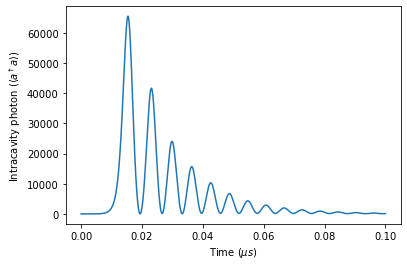

In [13]:
#############################################################
# Plots intracavity field
#############################################################
plt.plot(results[0], results[3])
plt.xlabel(r"Time ($\mu s$)")
plt.ylabel(r"Intracavity photon ($\langle a^\dagger a\rangle$)")

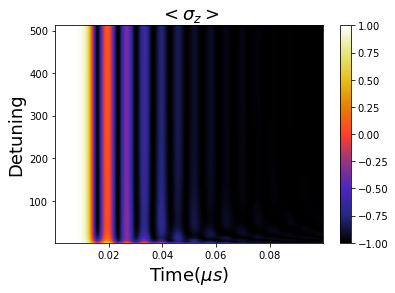

In [14]:
utils.plot_heat(results[0],detuning_values_1d, np.rot90(results[1]), -1.0,1.0)